############### Investment Case Study ######################


In [53]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Checkpoint 1: Data Cleaning 1 


In [54]:
#Making the function that will help us in cleaning data
def Clean_string(string):
    string = string.lower()
    string = string.replace(r'/organization/','')
    string = string.lower()
    return string

In [55]:
#### Cleaning rounds2 table   #####

rounds2 = pd.read_csv("rounds2.csv", encoding='latin1')
rounds2['company_permalink'] = rounds2['company_permalink'].apply(Clean_string)
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x[1:] if x[0] == '-' else x)
rounds2.head()



,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [56]:
## Q1. How many unique companies are present in rounds2?

print("There are ",len(rounds2['company_permalink'].unique()), " unique companies in rounds2 table")


There are  66370  unique companies in rounds2 table


In [57]:
##### Cleaning companies table ########

In [58]:
companies = pd.read_csv("companies.csv", encoding='latin1')

In [59]:
companies['permalink'] = companies['permalink'].apply(Clean_string)
companies['permalink'] = companies['permalink'].apply(lambda x: x[1:] if x[0] == '-' else x)
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
4,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010


In [60]:
## Q2. How many unique companies are present in companies table?

print("There are ",len(companies['permalink'].unique()), " unique companies in companies table")


There are  66368  unique companies in companies table


In [61]:
#### Q4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

len(rounds2[rounds2['company_permalink'].isin(companies['permalink'])==False])


7

In [62]:
### Merging the rounds2 & companies data

master_frame = pd.merge(rounds2,companies, how='left', left_on=['company_permalink'], right_on=['permalink']).reindex(companies.index)

master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
3,the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,ned-biosystems,/funding-round/309d9ab1f63042a0b68ab45acc1c5365,venture,NaN,27-10-2015,1507500.0,ned-biosystems,NED Biosystems,http://www.nedbiosystems.com/,Biotechnology,operating,USA,CT,CT - Other,Washington Depot,1/1/2008
66364,nediyor,/funding-round/28ca55c9fad69886b50d55d385df5a8f,seed,NaN,7/8/2012,140449.0,nediyor,nediyor.com,http://www.nediyor.com,Content Discovery|Curated Web|News,operating,TUR,34,Istanbul,Istanbul,6/6/2012
66365,need,/funding-round/52a5ee4767326017bf8c10a912464e17,angel,NaN,17-06-2013,115000.0,need,Need,http://neededition.com,E-Commerce|Fashion|Lifestyle|Mobile|Technology,operating,USA,TX,Dallas,Dallas,25-02-2013
66366,need,/funding-round/9d126ea964931f5507a1aa733eacf53f,seed,NaN,28-05-2014,500000.0,need,Need,http://neededition.com,E-Commerce|Fashion|Lifestyle|Mobile|Technology,operating,USA,TX,Dallas,Dallas,25-02-2013


In [63]:
### Dropping the company_permalink column as it is blank

master_frame = master_frame.drop(['company_permalink'], axis=1)
len(master_frame)

66368

## Checkpoint 2: Funding Type Analysis




In [64]:
master_frame.isna().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         48398
funded_at                      0
raised_amount_usd          11490
permalink                      4
name                           4
homepage_url                3495
category_list               1999
status                         4
country_code                4914
state_code                  6296
region                      5837
city                        5837
founded_at                 11816
dtype: int64

In [65]:

Private = master_frame[master_frame['funding_round_type'] == "private_equity"]

Private.median()

raised_amount_usd    19310714.0
dtype: float64

In [66]:

Venture = master_frame[master_frame['funding_round_type'] == "venture"]

Venture.median()

raised_amount_usd    5000000.0
dtype: float64

In [67]:
Angel = master_frame[master_frame['funding_round_type'] == "angel"]

Angel.median()

raised_amount_usd    400000.0
dtype: float64

In [68]:
Seed = master_frame[master_frame['funding_round_type'] == "seed"]

Seed.median()

raised_amount_usd    280000.0
dtype: float64

In [69]:
##### 2.1 Representative Values of Investments for Each of these Funding Types 

<ipython-input-70-574e7d681eda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame2['raised_amount_usd'] = round(master_frame2['raised_amount_usd']/1000000,2)


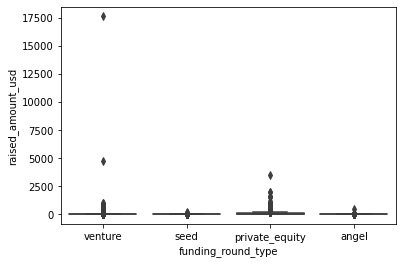

In [70]:

master_frame2 = master_frame[(master_frame.funding_round_type.isin(["venture","seed","angel","private_equity"]))]
master_frame2['raised_amount_usd'] = round(master_frame2['raised_amount_usd']/1000000,2)

#check  = check.groupby(['funding_round_type'])['raised_amount_usd'].sum()
#check = check.reset_index()
#check.sort_values('raised_amount_usd', ascending=False, inplace=True)

#Lets do some more analysis to get an idea of central tendency using box plot
import seaborn as sns
%matplotlib inline

sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame2)


In [71]:
master_frame2.dropna(subset = ['raised_amount_usd'], inplace=True)
summary = master_frame2.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False).reset_index()
#print(summary[summary['raised_amount_usd'].between(5, 15)])
summary

<ipython-input-71-6d8c87d1079b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame2.dropna(subset = ['raised_amount_usd'], inplace=True)


,funding_round_type,raised_amount_usd
0,private_equity,19.31
1,venture,5.00
2,angel,0.40
3,seed,0.28


In [72]:
### As we will go with Venture type we will filter the data

master_filter = master_frame2[master_frame2['funding_round_type'] == "venture"]

master_filter = master_filter[['funding_round_type','raised_amount_usd', 'permalink', 'name','category_list', 'status', 'country_code']]
len(master_filter)
master_filter

,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code
0,venture,10.00,fame,#fame,Media,operating,IND
3,venture,3.41,the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,venture,2.00,0-6-com,0-6.com,Curated Web,operating,CHN
8,venture,0.72,0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,venture,20.00,0xdata,H2O.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...
66347,venture,19.00,nebuad,NebuAd,Advertising,closed,USA
66350,venture,25.00,nebula,"Nebula, Inc.",Cloud Computing|Enterprise Software|Hardware,closed,USA
66351,venture,10.00,nebula,"Nebula, Inc.",Cloud Computing|Enterprise Software|Hardware,closed,USA
66354,venture,0.11,nebulab,Nebulab,Cloud Data Services|Data Integration|SaaS,operating,USA


## Checkpoint 3: Country Analysis

In [73]:
top9 = master_filter.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()[0:9]
top9 # Top 9 countries, lets filter out the non english speaking countires

,country_code,raised_amount_usd
0,USA,251507.39
1,CHN,25371.54
2,GBR,10717.57
3,IND,9655.89
4,CAN,5498.91
5,DEU,4307.95
6,ISR,4277.14
7,FRA,4009.28
8,SGP,2202.72


## Checkpoint 4: Sector Analysis 1

In [74]:
mapping = pd.read_csv('mapping.csv')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [75]:
#We can see that there is 0 is present in place of "na" so replace them

mapping['category_list'] = mapping['category_list'].str.replace('0','na')

len(mapping['category_list'].unique())

688

In [76]:
mapping = mapping.dropna()
len(mapping['category_list'].unique())

687

In [77]:
value_var = list(mapping.columns[1:])
id_var = list(np.setdiff1d(mapping.columns, value_var))
print(value_var)
print(id_var)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']
['category_list']


In [78]:
df = pd.melt(mapping, id_vars = id_var, value_vars =value_var)
df = df[df['value'] == 1]
df = df.drop('value', axis=1)

In [79]:
df.rename(columns={'variable':'main_sector'}, inplace=True)
df

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


## Checkpoint 5: Sector Analysis 2

In [80]:

master_filter['Primary Sec'] = master_filter['category_list'].str.split('|', expand=True)[0]
master_frame3 = master_filter[(master_filter.country_code.isin(["USA","GBR","IND"]))].reset_index()

master_frame3 = pd.merge(master_frame3,df, how='left', left_on='Primary Sec', right_on='category_list')
master_frame3 =master_frame3[['funding_round_type', 'raised_amount_usd', 'permalink', 'name',
       'category_list_x', 'status', 'country_code', 'Primary Sec', 'main_sector']]
master_frame3.rename(columns={'category_list_x':'category_list'}, inplace=True)
master_frame3

,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,Primary Sec,main_sector
0,venture,10.00,fame,#fame,Media,operating,IND,Media,Entertainment
1,venture,20.00,0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,venture,1.70,0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,venture,8.90,0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,venture,5.00,1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...
22590,venture,19.00,nebuad,NebuAd,Advertising,closed,USA,Advertising,"Social, Finance, Analytics, Advertising"
22591,venture,25.00,nebula,"Nebula, Inc.",Cloud Computing|Enterprise Software|Hardware,closed,USA,Cloud Computing,"News, Search and Messaging"
22592,venture,10.00,nebula,"Nebula, Inc.",Cloud Computing|Enterprise Software|Hardware,closed,USA,Cloud Computing,"News, Search and Messaging"
22593,venture,0.11,nebulab,Nebulab,Cloud Data Services|Data Integration|SaaS,operating,USA,Cloud Data Services,"News, Search and Messaging"


In [81]:

def Split_string(string):
    string = str(string)
    string = string.split("|", 1)
    string = string[0]
    return string

master_frame3['category_list'] = master_frame3['category_list'].apply(Split_string)
master_frame3

,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,Primary Sec,main_sector
0,venture,10.00,fame,#fame,Media,operating,IND,Media,Entertainment
1,venture,20.00,0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,venture,1.70,0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,venture,8.90,0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,venture,5.00,1-mainstream,1 Mainstream,Apps,acquired,USA,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...
22590,venture,19.00,nebuad,NebuAd,Advertising,closed,USA,Advertising,"Social, Finance, Analytics, Advertising"
22591,venture,25.00,nebula,"Nebula, Inc.",Cloud Computing,closed,USA,Cloud Computing,"News, Search and Messaging"
22592,venture,10.00,nebula,"Nebula, Inc.",Cloud Computing,closed,USA,Cloud Computing,"News, Search and Messaging"
22593,venture,0.11,nebulab,Nebulab,Cloud Data Services,operating,USA,Cloud Data Services,"News, Search and Messaging"


In [82]:
##Now we will join category_list with mapping

master_frame3 = pd.merge(master_frame3, mapping, how='left', left_on=['category_list'], right_on=['category_list']).reindex(master_frame3.index)
master_frame3 = master_frame3[['name','permalink','main_sector','status','country_code','funding_round_type','raised_amount_usd']]
master_frame3 = master_frame3.rename(columns={'main_sector': 'category_list'})
master_frame3 = master_frame3[master_frame3['category_list'] != "Others"]
master_frame3

,name,permalink,category_list,status,country_code,funding_round_type,raised_amount_usd
0,#fame,fame,Entertainment,operating,IND,venture,10.00
1,H2O.ai,0xdata,"Social, Finance, Analytics, Advertising",operating,USA,venture,20.00
2,H2O.ai,0xdata,"Social, Finance, Analytics, Advertising",operating,USA,venture,1.70
3,H2O.ai,0xdata,"Social, Finance, Analytics, Advertising",operating,USA,venture,8.90
4,1 Mainstream,1-mainstream,"News, Search and Messaging",acquired,USA,venture,5.00
...,...,...,...,...,...,...,...
22590,NebuAd,nebuad,"Social, Finance, Analytics, Advertising",closed,USA,venture,19.00
22591,"Nebula, Inc.",nebula,"News, Search and Messaging",closed,USA,venture,25.00
22592,"Nebula, Inc.",nebula,"News, Search and Messaging",closed,USA,venture,10.00
22593,Nebulab,nebulab,"News, Search and Messaging",operating,USA,venture,0.11


In [83]:
master_frame4 = master_frame3.groupby(['country_code','category_list']).agg({'raised_amount_usd':['count','sum']})
master_frame4.columns = ["_".join(y) for y in master_frame4.columns.ravel()]
master_frame4.reset_index()

master_frame4 = master_frame4.sort_values(['country_code', 'category_list','raised_amount_usd_count'], ascending=[False, False, False])
master_frame4 = master_frame4.reset_index()

master_frame4.rename(columns={'raised_amount_usd_count':'Total number of investment'}, inplace=True)
master_frame4

,country_code,category_list,Total number of investment,raised_amount_usd_sum
0,USA,"Social, Finance, Analytics, Advertising",4139,53013.24
1,USA,"News, Search and Messaging",2456,27722.96
2,USA,Manufacturing,1347,13040.18
3,USA,Health,1873,18025.06
4,USA,Entertainment,1042,10750.10
5,USA,Cleantech / Semiconductors,4782,78125.92
6,USA,Automotive & Sports,278,2988.20
7,IND,"Social, Finance, Analytics, Advertising",87,866.67
8,IND,"News, Search and Messaging",71,897.45
9,IND,Manufacturing,34,470.91


In [84]:
Df1 = master_frame4[master_frame4['country_code'] == 'USA']
Df2 = master_frame4[master_frame4['country_code'] == 'GBR']
Df3 = master_frame4[master_frame4['country_code'] == 'IND']

#All 3 data frame created, now lets

In [85]:
#Total number of Investments (count)

print(Df1['Total number of investment'].sum())

print(Df2['Total number of investment'].sum())

print(Df3['Total number of investment'].sum())


15917
882
313


In [86]:
#Total sum of Investments

print(Df1['raised_amount_usd_sum'].sum())

print(Df2['raised_amount_usd_sum'].sum())

print(Df3['raised_amount_usd_sum'].sum())



203665.65999999995
8282.390000000001
4962.39


In [87]:
#Top Sector name (no. of investment-wise)
Df1.sort_values('Total number of investment', ascending=False, inplace=True)
Df1

<ipython-input-87-1f92f5ed66f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df1.sort_values('Total number of investment', ascending=False, inplace=True)


,country_code,category_list,Total number of investment,raised_amount_usd_sum
5,USA,Cleantech / Semiconductors,4782,78125.92
0,USA,"Social, Finance, Analytics, Advertising",4139,53013.24
1,USA,"News, Search and Messaging",2456,27722.96
3,USA,Health,1873,18025.06
2,USA,Manufacturing,1347,13040.18
4,USA,Entertainment,1042,10750.10
6,USA,Automotive & Sports,278,2988.20


In [88]:

Df2.sort_values('Total number of investment', ascending=False, inplace=True)
Df2

<ipython-input-88-2129d414303c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df2.sort_values('Total number of investment', ascending=False, inplace=True)


,country_code,category_list,Total number of investment,raised_amount_usd_sum
19,GBR,Cleantech / Semiconductors,277,3291.26
14,GBR,"Social, Finance, Analytics, Advertising",243,1987.61
15,GBR,"News, Search and Messaging",138,1153.81
16,GBR,Manufacturing,73,652.33
18,GBR,Entertainment,60,385.35
17,GBR,Health,58,376.00
20,GBR,Automotive & Sports,33,436.03


In [89]:
Df3.sort_values('Total number of investment', ascending=False, inplace=True)
Df3

<ipython-input-89-55ec1092ef3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df3.sort_values('Total number of investment', ascending=False, inplace=True)


,country_code,category_list,Total number of investment,raised_amount_usd_sum
7,IND,"Social, Finance, Analytics, Advertising",87,866.67
8,IND,"News, Search and Messaging",71,897.45
11,IND,Entertainment,43,461.57
9,IND,Manufacturing,34,470.91
12,IND,Cleantech / Semiconductors,27,471.77
10,IND,Health,26,307.07
13,IND,Automotive & Sports,25,1486.95


In [90]:

#For the top sector count-wise (point 3), which company received the highest investment?

temp = master_frame3.loc[(master_frame3.country_code == 'USA') & (master_frame3.category_list == 'Cleantech / Semiconductors')]
temp = temp.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()


temp2 = master_frame3.loc[(master_frame3.country_code == 'GBR') & (master_frame3.category_list == 'Cleantech / Semiconductors')]
temp2 = temp2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()


temp3 = master_frame3.loc[(master_frame3.country_code == 'IND') & (master_frame3.category_list == 'Social, Finance, Analytics, Advertising')]
temp3 = temp3.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()

print(temp.iloc[0][0])
print(temp2.iloc[0][0])
print(temp3.iloc[0][0])



Freescale Semiconductor
Immunocore
BankBazaar.com


In [91]:
## For point 4 (second best sector count-wise), which company received the highest investment?

print(temp.iloc[1][0])
print(temp2.iloc[1][0])
print(temp3.iloc[1][0])

Juno Therapeutics
Circassia
Komli Media


### Checkpoint 6: Plots

- As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots
- A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

- A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

- A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

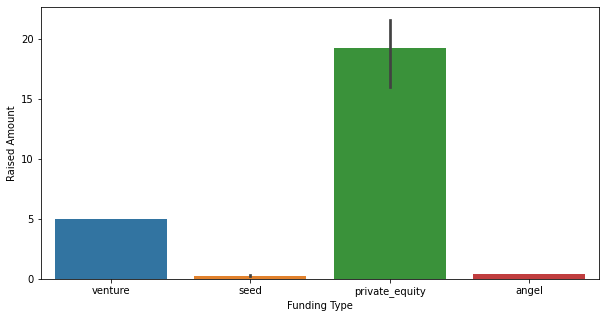

In [92]:
#1st Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame2, estimator=np.median)
g.set(xlabel='Funding Type', ylabel='Raised Amount')
plt.show()

In [93]:
link = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
top_english = pd.read_html(link)[0]


In [94]:

second_english = pd.read_html(link)[1]
second_english

,No.,Country,Alpha-3 code,Region,Population1,Primary language?
0,1,Antigua and Barbuda[2],ATG,Caribbean,85000,Yes
1,2,Bahamas[2],BHS,Caribbean,331000,Yes
2,3,Barbados[3],BRB,Caribbean,294000,Yes
3,4,Belize[4],BLZ,Central America,288000,Yes
4,5,Botswana[4],BWA,Africa,1882000,No
5,6,Burundi[5],BDI,Africa,10114505,No
6,7,Cameroon[2],CMR,Africa,22534532,No
7,8,Canada[2],CAN,North America,35985751,"Yes (except Quebec, northern New Brunswick)"
8,9,Dominica[2],DMA,Caribbean,73000,Yes
9,10,Eswatini[2],SWZ,Africa,1141000,No


In [95]:

final_list = top_english.append(second_english)
final_list = final_list[['Alpha-3 code','Country']]
final_list

,Alpha-3 code,Country
0,AUS,Australia
1,NZL,New Zealand[1]
2,GBR,United Kingdom
3,USA,United States
0,ATG,Antigua and Barbuda[2]
1,BHS,Bahamas[2]
2,BRB,Barbados[3]
3,BLZ,Belize[4]
4,BWA,Botswana[4]
5,BDI,Burundi[5]


In [96]:
#2nd Plot
English_Speaking = final_list['Alpha-3 code'].to_list()
English_Speaking

df = master_frame2.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()[0:9]
df.loc[df['country_code'].str.contains('CHN|DEU|ISR|FRA|RUS'), 'Language'] = 'Not-English'
df.loc[df['country_code'].str.contains('USA|GBR|IND|CAN'), 'Language'] = 'English'


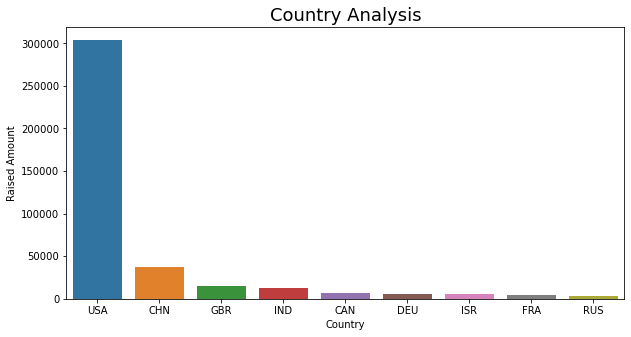

In [97]:

plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=df, estimator=np.sum)
c.set(xlabel='Country', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

In [98]:
#3rd Plot
Df1 = Df1[['country_code','category_list','Total number of investment']]
Df1['Rank'] = Df1['Total number of investment'].rank(ascending=False)
Df1 = Df1[Df1['Rank'] < 4]

Df2 = Df2[['country_code','category_list','Total number of investment']]
Df2['Rank'] = Df2['Total number of investment'].rank(ascending=False)
Df2 = Df2[Df2['Rank'] < 4]

Df3 = Df3[['country_code','category_list','Total number of investment']]
Df3['Rank'] = Df3['Total number of investment'].rank(ascending=False)
Df3 = Df3[Df3['Rank'] < 4]

Dataframe = pd.concat([Df1, Df2, Df3], ignore_index=True)
Dataframe = Dataframe.rename(columns={"country_code": "Country", "category_list": "Sector"})
Dataframe

,Country,Sector,Total number of investment,Rank
0,USA,Cleantech / Semiconductors,4782,1.0
1,USA,"Social, Finance, Analytics, Advertising",4139,2.0
2,USA,"News, Search and Messaging",2456,3.0
3,GBR,Cleantech / Semiconductors,277,1.0
4,GBR,"Social, Finance, Analytics, Advertising",243,2.0
5,GBR,"News, Search and Messaging",138,3.0
6,IND,"Social, Finance, Analytics, Advertising",87,1.0
7,IND,"News, Search and Messaging",71,2.0
8,IND,Entertainment,43,3.0


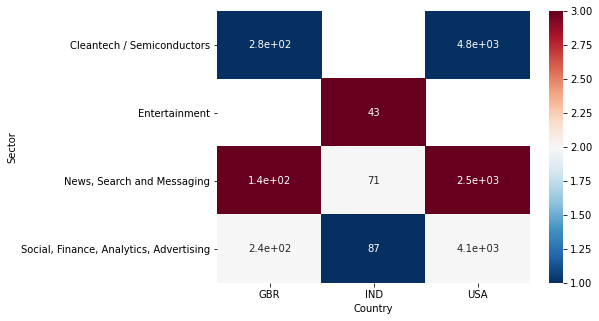

In [99]:
result = pd.pivot_table(data = Dataframe,index='Sector',columns='Country',values='Total number of investment',aggfunc=lambda x: np.sum(x))

result_count = pd.pivot_table(data = Dataframe,index='Sector',columns='Country',values='Rank',aggfunc=lambda x: np.sum(x))

ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(result_count,cmap='RdBu_r',annot=result)
plt.show()